In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from global_variables import *
from data_process import *

In [2]:
city = 'KSAN'
start_date = '19900101'
end_date = '201904301'
assert isinstance(city, str), 'city is not valid'
fname = get_city_fname(city)
assert os.path.exists(fname), 'file does not exist'
origin_data = pd.DataFrame(pd.read_csv(fname))
origin_data.set_index(["date"], inplace=True)
selected_data = origin_data.loc[start_date:end_date]

In [3]:
icon_count = count_icon_days(selected_data)
print(icon_count)

              days
icon              
partlysunny   2460
partlycloudy  2302
mostlysunny   1491
rain          1328
hazy          1133
clear          833
mostlycloudy   725
cloudy         348
tstorms         92


In [4]:
labels = icon_count.index.tolist()
values = icon_count.days.tolist()
print(labels)
print(values)

['partlysunny', 'partlycloudy', 'mostlysunny', 'rain', 'hazy', 'clear', 'mostlycloudy', 'cloudy', 'tstorms']
[2460, 2302, 1491, 1328, 1133, 833, 725, 348, 92]


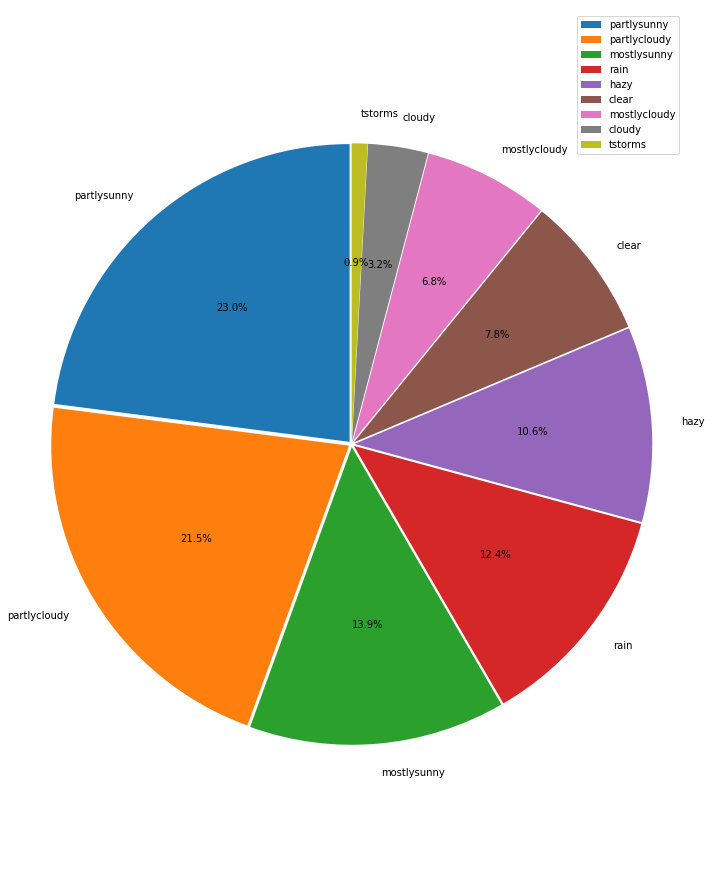

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,16))
explode = tuple([0.01] * len(labels))


patches,l_text,p_text = plt.pie(values,explode=explode,labels=labels,labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

for t in l_text:
    t.set_size=(1000)
for t in p_text:
    t.set_size=(100000)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()
# 设置x，y轴刻度一致，这样饼图才能是圆的
#plt.axis('equal')
#plt.legend()
plt.show()

[0, 365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113, 5479, 5844, 6209, 6574, 6940, 7305, 7670, 8035, 8401, 8766, 9131, 9496, 9862, 10227, 10592]


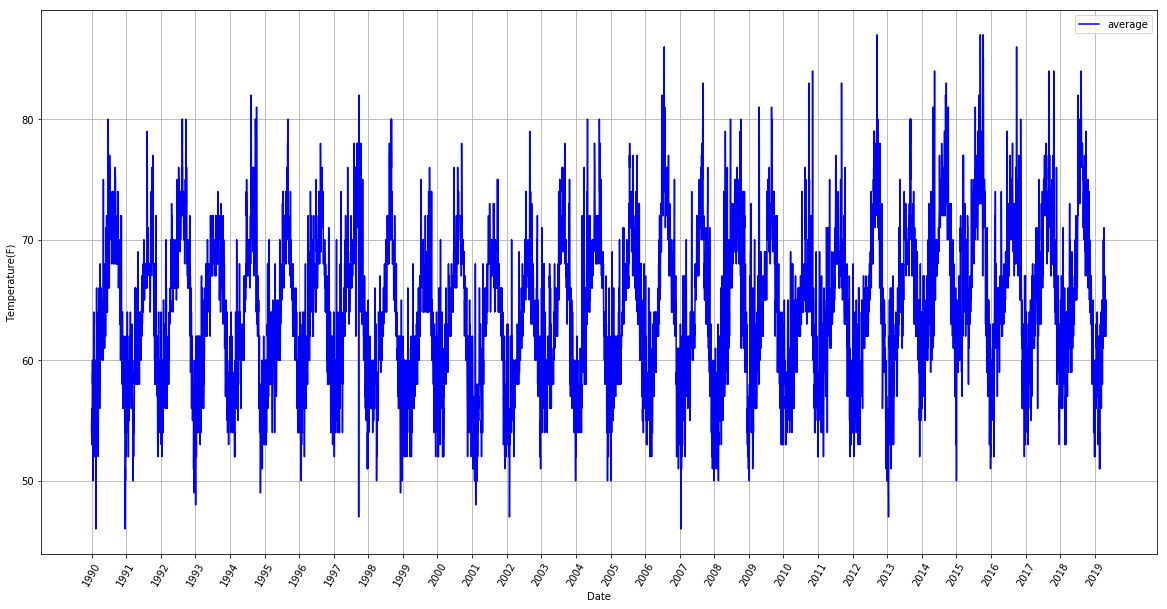

In [8]:
plt.figure(figsize=(20,10))
new_list = [list(range(int(selected_data.min_temperature.tolist()[i]),int(selected_data.max_temperature.tolist()[i]))) for i in range(len(selected_data))]
plt.plot(range(len(selected_data)),selected_data.temperature,'b',label='average')
# plt.plot(range(len(selected_data)),selected_data.max_temperature,'gray',label='highest')
# plt.plot(range(len(selected_data)),selected_data.min_temperature,'gray',label='lowest')
#plt.plot(range(len(selected_data)),new_list,'gray',label='lowest')
plt.xlabel('Date')
plt.ylabel('Temperature(F)')
locs = []
dates = []
count = 0
for date in selected_data.index.tolist():
    if str(date)[-4:]=='0101':
        locs.append(count)
        dates.append(str(date)[0:4])
    count +=1
print(locs) 

plt.xticks(locs,dates,rotation=60)
plt.legend(bbox_to_anchor=[1, 1])
plt.grid()
plt.show()